In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

In [ ]:
# if data is in different csv files then concatenate using the following command:
# df1 = pd.read_csv(‘./data/2017Q1.csv’, skiprows=[0])
# df2 = pd.read_csv(‘./data/2017Q2.csv’, skiprows=[0])
# df3 = pd.read_csv(‘./data/2017Q3.csv’, skiprows=[0])
# df4 = pd.read_csv(‘./data/2014.csv’, skiprows=[0])
# df5 = pd.read_csv(‘./data/2015.csv’, skiprows=[0])

# columns = np.dstack((list(df1.columns), list(df2.columns), list(df3.columns), list(df4.columns), list(df5.columns)))
# coldf = pd.DataFrame(columns[0])

# df = pd.concat([df1, df2, df3, df4, df5])
# df.shape

In [21]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
# print(list(df.columns))
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [23]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# if you want to pick up rows corresponding to some particular values in a column

# df = df.loc[(df['loan_status'].isin(['Fully Paid', 'Charged Off']))]

In [12]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

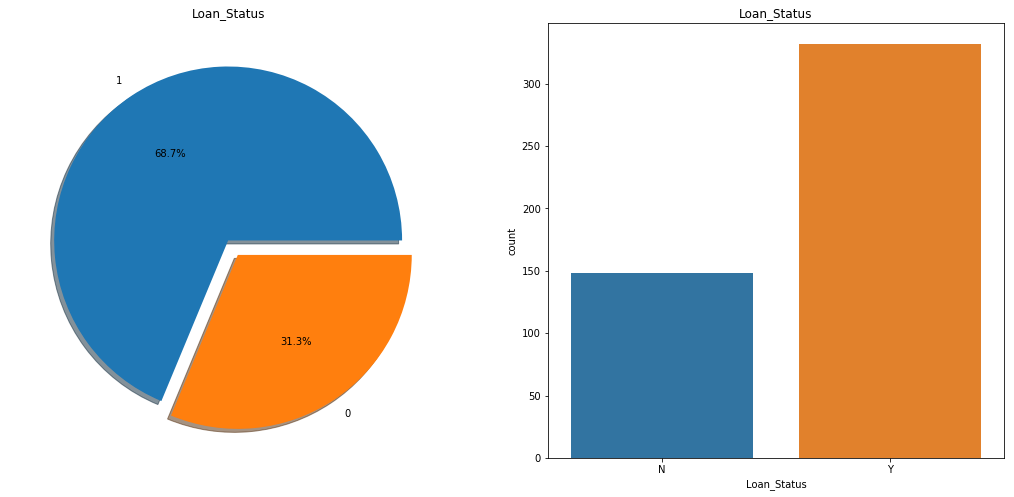

In [86]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Loan_Status')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan_Status')
plt.show()

In [14]:
# Remove features associated with >85% missing values
# Remove constant features
# Remove duplicates features
# Remove duplicate rows
# Remove highly collinear features

In [16]:
# 1. the following code shows the features that have around 90% data missing and hnce removed it from the dataset

# missing_df = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()
# miss_4000 = list(missing_df[missing_df.missing_value >= 400000]['index'])
# print(len(miss_4000))
# 53
# df.drop(miss_4000, axis = 1, inplace = True)

#inplace makes the changes in the original dataset as well

In [17]:
# 2. Remove constant features: At this step, we remove features that have a single unique value. 
#     A feature associated with one unique value does not help the model to generalize well since it’s variance is zero. 
#     A tree-based model cannot take advantage of these type of features since the model can not split these features.
    
# def find_constant_features(dataFrame):
#     const_features = []
#     for column in list(dataFrame.columns):
#         if dataFrame[column].unique().size < 2:
#             const_features.append(column)
#     return const_features
# const_features = find_constant_features(df)
# print(const_features)
# ['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']

# df.drop(const_features, axis = 1, inplace = True)

# The function goes through each feature and sees if it has less than two unique values. 
# If so, the features are added to the constant feature list. 
# We can also find out constant feature looking at the variance or standard deviation. 
# If the feature has zero variance or standard deviation, we are sure that the feature has single unique value. 

In [18]:
# 3. Remove duplicate features: Duplicate features are those have the same value in multiple features 
#     with the same/different name. 
    
# def duplicate_columns(frame):
#     groups = frame.columns.to_series().groupby(frame.dtypes).groups
#     dups = []
# for t, v in groups.items():
# cs = frame[v].columns
#         vs = frame[v]
#         lcs = len(cs)
# for i in range(lcs):
#             ia = vs.iloc[:,i].values
#             for j in range(i+1, lcs):
#                 ja = vs.iloc[:,j].values
#                 if np.array_equal(ia, ja):
#                     dups.append(cs[i])
#                     break
#     return dups
# duplicate_cols = duplicate_columns(df)
# print(duplicate_cols)
# ['loan_amnt']

In [19]:
# 4. Remove duplicate rows: In this step, we remove all the duplicate rows. 
#     Use pandas built-in “drop_duplicates(inplace= True)” method to perform this action:

# df.drop_duplicates(inplace= True)

In [30]:
#       *****PART 2: Data Visvualization 


def plot_feature(col_name, isContinuous):
#     """
#     Visualize a variable with and without faceting on the loan status.
#     - col_name is the variable name in the dataframe
#     - full_name is the full variable name
#     - continuous is True if the variable is continuous, False otherwise
#     """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(train.loc[train[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(train[col_name], order=sorted(train[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)
# Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='Loan_Status', data=train, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = train.groupby(col_name)['Loan_Status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "Loan_Status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()



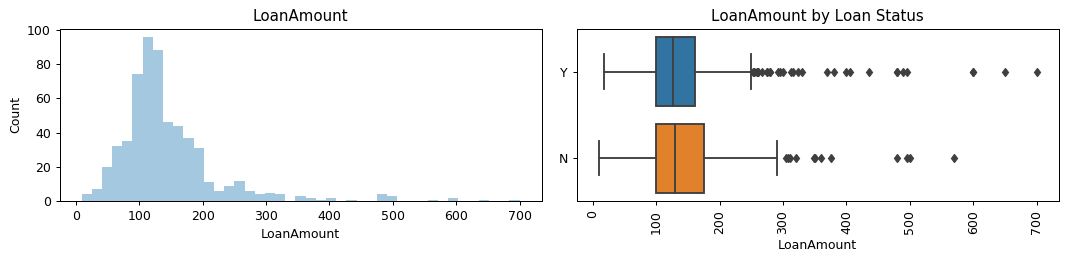

In [31]:
## Feature: loan_amnt
# -------------------------------
len(train.LoanAmount.value_counts())
1415
plot_feature('LoanAmount', True)

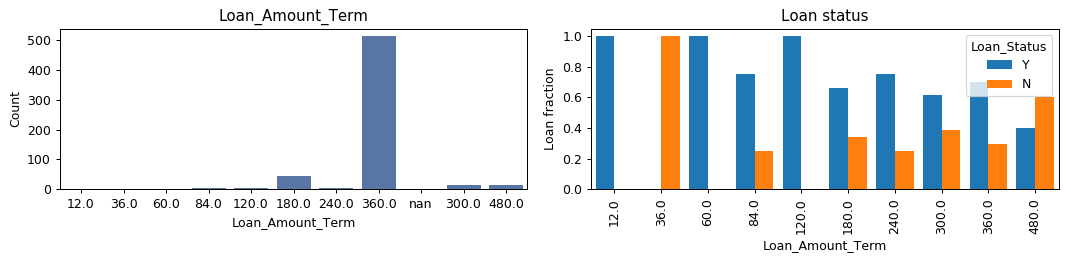

In [35]:
# ## Feature: term
# -------------------------------
# train.Loan_Amount_Term = train.Loan_Amount_Term.str.replace('months', '').astype(np.int)
train.Loan_Amount_Term.value_counts()

plot_feature('Loan_Amount_Term', False)

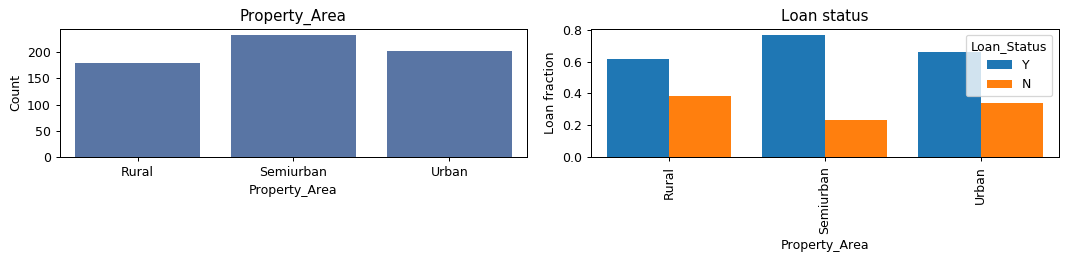

In [40]:

### Feature: int_rate
# -------------------------------
# train.Property_Area = train.Property_Area.str.replace('%', '').astype(np.float32)
train.Property_Area.value_counts()

plot_feature('Property_Area', False)


Text(0.5, 0.98, '')

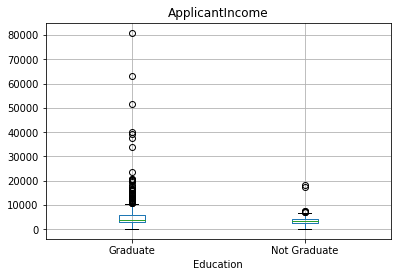

In [42]:
# if you want to draw plots grouping a specific feature in a feature

train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

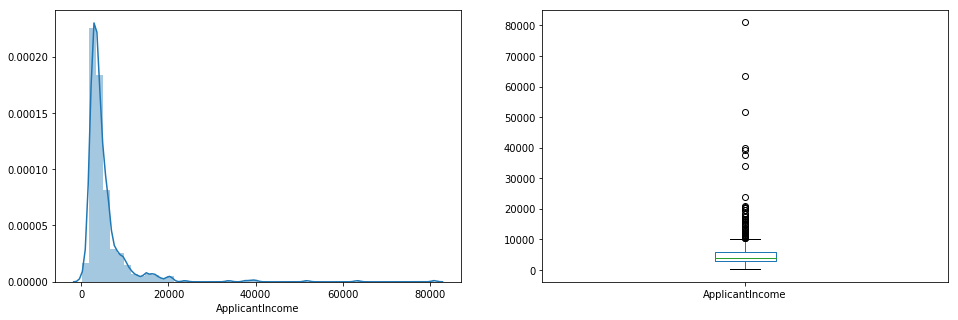

In [50]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()


In [51]:
# since ApplicantIncome had so many outliers we try to group it and see the categories that are creating these 
# ouliers, the graph above this

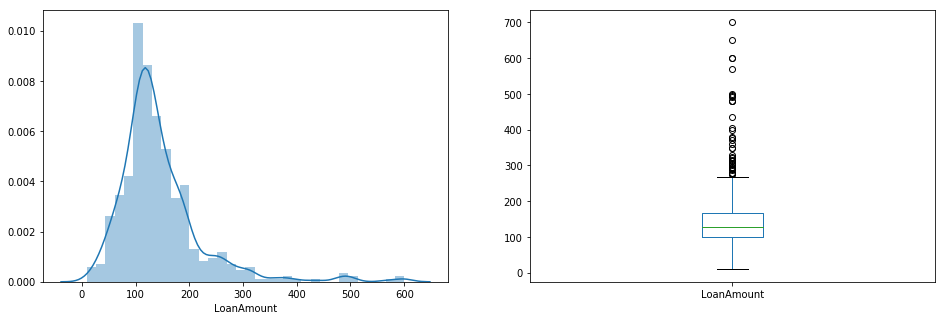

In [52]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

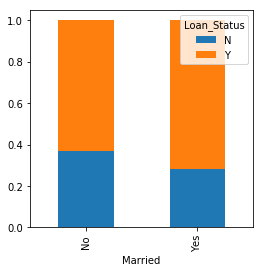

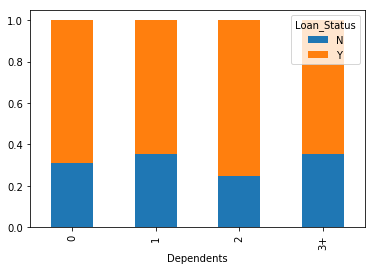

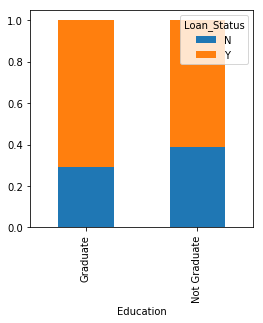

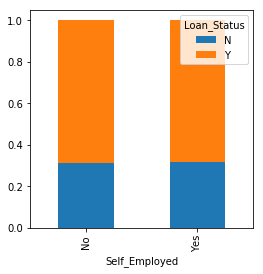

In [61]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 


Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

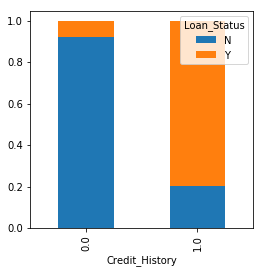

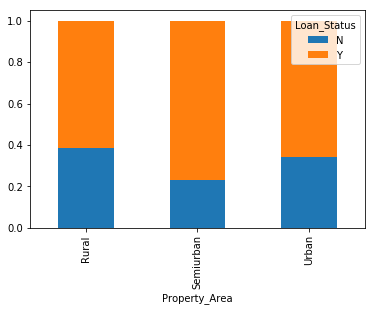

In [65]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


Text(0.5, 0.98, '')

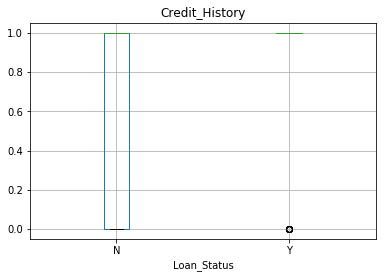

In [66]:
train.boxplot(column='Credit_History', by = 'Loan_Status') 
plt.suptitle("")

In [68]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

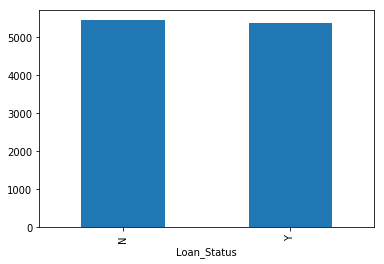

In [69]:
# We will try to find the mean income of people for which the loan has been approved vs the 
# mean income of people for which the loan has not been approved.

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

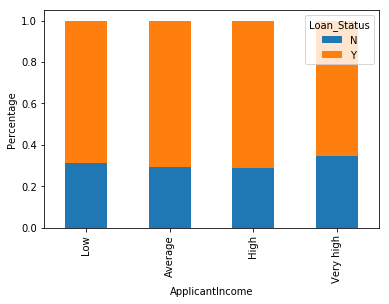

In [72]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

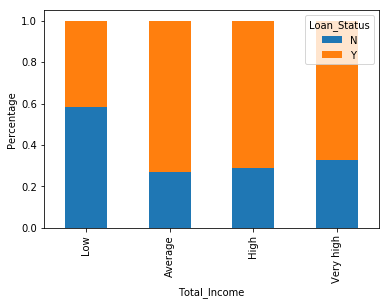

In [74]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


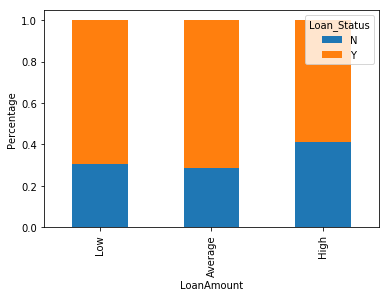

In [76]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [77]:
# It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount 
# as compared to that of High Loan Amount which supports our hypothesis in which we considered that 
# the chances of loan approval will be high when the loan amount is less.

In [78]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,6000.0,High,Average


In [80]:
train=train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

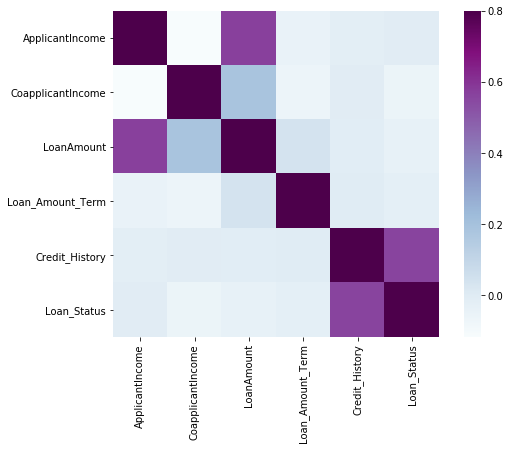

In [82]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [88]:
# checking for correlation between features
features = df.columns.values[:]
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

In [89]:
#highest correlated
correlations.tail(10)

,level_0,level_1,0
20,Loan_Amount_Term,CoapplicantIncome,0.059878
21,CoapplicantIncome,Loan_Amount_Term,0.059878
22,CoapplicantIncome,ApplicantIncome,0.116605
23,ApplicantIncome,CoapplicantIncome,0.116605
24,CoapplicantIncome,LoanAmount,0.188619
25,LoanAmount,CoapplicantIncome,0.188619
26,Loan_Status,Credit_History,0.561678
27,Credit_History,Loan_Status,0.561678
28,LoanAmount,ApplicantIncome,0.570909
29,ApplicantIncome,LoanAmount,0.570909


In [90]:
#least correlated
correlations.head(10)

,level_0,level_1,0
0,Credit_History,Loan_Amount_Term,0.001470
1,Loan_Amount_Term,Credit_History,0.001470
2,Credit_History,CoapplicantIncome,0.002056
3,CoapplicantIncome,Credit_History,0.002056
4,ApplicantIncome,Loan_Status,0.004710
5,Loan_Status,ApplicantIncome,0.004710
6,Credit_History,LoanAmount,0.008433
7,LoanAmount,Credit_History,0.008433
8,ApplicantIncome,Credit_History,0.014715
9,Credit_History,ApplicantIncome,0.014715


In [103]:
# checking correlation of all features with the tarfet variable


corr = train.corr()
corr['Loan_Status'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,Loan_Status,1.000000
1,Credit_History,0.540556
2,ApplicantIncome,-0.004710
3,Loan_Amount_Term,-0.022549
4,LoanAmount,-0.033214
5,LoanAmount_log,-0.037997
6,CoapplicantIncome,-0.059187


In [91]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
# For numerical variables: imputation using mean or median
# For categorical variables: imputation using mode


train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [93]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [94]:
# It can be seen that in loan amount term variable, the value of 360 is repeating the most. 
# So we will replace the missing values in this variable using the mode of this variable.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [96]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [97]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [99]:
# Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 
# This is called right skewness. One way to remove the skewness is by doing the log transformation. 
# As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 
# So, we get a distribution similar to normal distribution.

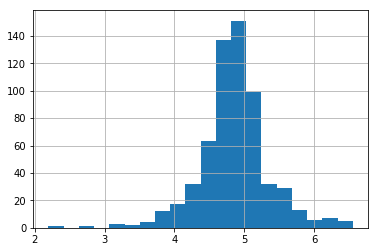

In [100]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 

test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [106]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
# Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5


C:\Users\Ayushi.Goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Semiurban'

In [ ]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', 
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',      
                                              max_depth=None, max_features='auto', max_leaf_nodes=None,    
                                              min_impurity_decrease=0.0, min_impurity_split=None,       
                                              min_samples_leaf=1, min_samples_split=2,     
                                              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,   
                                              oob_score=False, random_state=1, verbose=0, warm_start=False),       
fit_params=None, iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
scoring=None, verbose=0)
# Estimating the optimized value 
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            max_depth=3, max_features='auto', max_leaf_nodes=None,            min_impurity_decrease=0.0, min_impurity_split=None,            
min_samples_leaf=1, min_samples_split=2,            
min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            
oob_score=False, random_state=1, verbose=0, warm_start=False)

# So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]

In [ ]:
# Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [ ]:
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = XGBClassifier(n_estimators=50, max_depth=4)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]